# Multiclass Classification

"Binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes" stated in the book Hands-On Machine Learning with - Aurelien Geron

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
#https://archive.ics.uci.edu/ml/datasets/wine+quality
#Importing the data set
wine = pd.read_excel("winequality-red.xlsx")

# Data Sneak Peak

In [154]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [155]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [156]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BFFB815C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021BFFE53080>]], dtype=object)

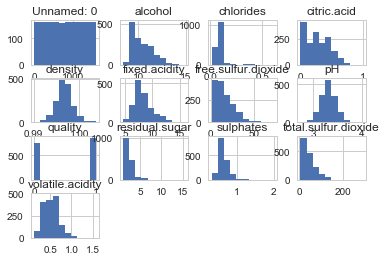

In [128]:
wine.hist()

# Correlation Matrix

In [157]:
wine.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,-0.26,0.67,0.11,0.094,-0.15,-0.11,0.67,-0.68,0.18,-0.062,0.12
volatile acidity,-0.26,1.0,-0.55,0.0019,0.061,-0.011,0.076,0.022,0.23,-0.26,-0.2,-0.39
citric acid,0.67,-0.55,1.0,0.14,0.2,-0.061,0.036,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.0019,0.14,1.0,0.056,0.19,0.2,0.36,-0.086,0.0055,0.042,0.014
chlorides,0.094,0.061,0.2,0.056,1.0,0.0056,0.047,0.2,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.011,-0.061,0.19,0.0056,1.0,0.67,-0.022,0.07,0.052,-0.069,-0.051
total sulfur dioxide,-0.11,0.076,0.036,0.2,0.047,0.67,1.0,0.071,-0.066,0.043,-0.21,-0.19
density,0.67,0.022,0.36,0.36,0.2,-0.022,0.071,1.0,-0.34,0.15,-0.5,-0.17
pH,-0.68,0.23,-0.54,-0.086,-0.27,0.07,-0.066,-0.34,1.0,-0.2,0.21,-0.058
sulphates,0.18,-0.26,0.31,0.0055,0.37,0.052,0.043,0.15,-0.2,1.0,0.094,0.25


# Splitting the data

In [159]:
y = wine['quality']

Text(0,0.5,'Count of datapoints')

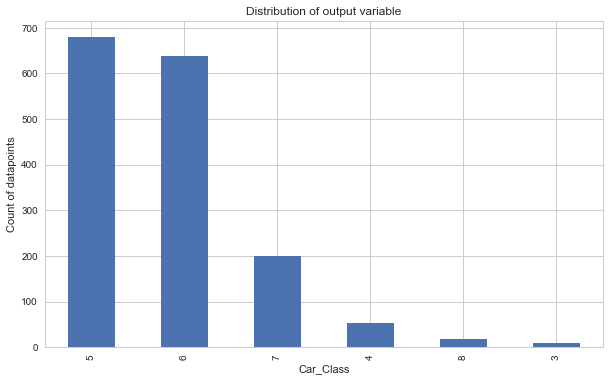

In [160]:
#Distribution of output variable
plt.figure(figsize=(10,6))
y.value_counts().plot(kind='bar')
plt.title("Distribution of output variable")
plt.xlabel("Quality of Wine")
plt.ylabel("Count of datapoints")

In [161]:
#To get the count of the output variable distribution
#https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list/2162045
import collections
counter=collections.Counter(y)
print(counter)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


In [258]:
#https://stackoverflow.com/questions/40354490/python-list-find-percentage-of-the-times-that-a-word-appears
#To find the % of data points for the target variable for BASELINE ACCURACY
from collections import Counter

count = Counter(y).items()

percentages = {x: float(float(z) / len(y) * 100) for x, z in count}
percentages

{3: 0.6253908692933083,
 4: 3.314571607254534,
 5: 42.589118198874296,
 6: 39.89993746091307,
 7: 12.445278298936834,
 8: 1.125703564727955}

In [259]:
#Dropping all the variables that has negative correlation with the out variable
x = wine.drop(['quality','volatile acidity','chlorides','density','free sulfur dioxide','total sulfur dioxide','pH'], axis = 1)

In [260]:
#To split data into training and testing data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Decision Tree

In [319]:
# Import Tree methods and fit the training set to Decision Tree model
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [320]:
# Predict the target variable
y_pred = tree_model.predict(x_test)

In [336]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report:')
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.59375


Confusion Matrix:


[[ 0  0  0  1  1  0]
 [ 0  2  8  1  0  0]
 [ 1  1 90 39  5  0]
 [ 0  3 35 81  7  2]
 [ 0  2  3 17 16  2]
 [ 0  0  0  1  1  1]]


Classification Report:


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.25      0.18      0.21        11
          5       0.66      0.66      0.66       136
          6       0.58      0.63      0.60       128
          7       0.53      0.40      0.46        40
          8       0.20      0.33      0.25         3

avg / total       0.59      0.59      0.59       320



# Hyperparameter Tuning 

In [322]:
from scipy.stats import randint

In [323]:
from  sklearn.model_selection import RandomizedSearchCV

In [ ]:
#set the refit value to True. 10 iterations and 5 cross-validation
Decision_Tree_tunning = RandomizedSearchCV(tree_model,param_distributions=param_dist,refit = True,n_iter = 10,cv=5)

In [330]:
# Create a dictionary of parameter options
param_dist = {"max_depth": randint(1,10),
              "max_features": randint(1, 3),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [332]:
Decision_Tree_tunning.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021B824D05C0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021B824D0A20>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021B824D0B00>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [333]:
# Best hyperparameters from RandomizedSearch
print("Tuned Decision Tree Parameters: {}".format(Decision_Tree_tunning.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 7}


In [334]:
y_pred_CV = Decision_Tree_tunning.predict(x_test)

In [329]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_CV))
print('\n')
print('Confusion Matrix:')
print('\n')
print(confusion_matrix(y_test,y_pred_CV))
print('\n')
print('Classification Report:')
print('\n')
print(classification_report(y_test,y_pred_CV))

Accuracy Score: 0.55625


Confusion Matrix:


[[  0   0   1   1   0   0]
 [  0   0   8   3   0   0]
 [  0   0 106  30   0   0]
 [  0   0  56  72   0   0]
 [  0   0   2  38   0   0]
 [  0   0   1   2   0   0]]


Classification Report:


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        11
          5       0.61      0.78      0.68       136
          6       0.49      0.56      0.53       128
          7       0.00      0.00      0.00        40
          8       0.00      0.00      0.00         3

avg / total       0.46      0.56      0.50       320



C:\Users\ts_ta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy decreases and it indicates that the non parametrized model is overfitting and hence the parametrized model's accuracy has gone down after hyper parameter tuning

# Naive Bayes

In [275]:
from sklearn.naive_bayes import GaussianNB

In [276]:
model = GaussianNB()

In [277]:
model.fit(x_train,y_train)

GaussianNB(priors=None)

In [278]:
# Predict the target variable
rf_pred=rf_model.predict(x_test)

In [279]:
print('Accuracy Score:',accuracy_score(y_test,rf_pred))
print('\n')
print('Confusion Matrix:')
print('\n')
print(confusion_matrix(y_test,rf_pred))
print('\n')
print('Classification Report:')
print('\n')
print(classification_report(y_test,rf_pred))

Accuracy Score: 0.653125


Confusion Matrix:


[[  0   0   1   1   0   0]
 [  0   0   7   4   0   0]
 [  0   0 102  33   1   0]
 [  0   0  35  87   6   0]
 [  0   0   2  18  20   0]
 [  0   0   0   2   1   0]]


Classification Report:


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        11
          5       0.69      0.75      0.72       136
          6       0.60      0.68      0.64       128
          7       0.71      0.50      0.59        40
          8       0.00      0.00      0.00         3

avg / total       0.62      0.65      0.63       320



C:\Users\ts_ta\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model proves: "Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling
multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are
strictly binary classifiers" statement,stated in the book Hands-On Machine Learning with - Aurelien Geron